## **Pregunta 1: Distribución de un parámetro**

• Genere artificialmente las siguientes variables:

$Xt$ con una distribución normal con media 0 y varianza 1 de 100 datos

$Et$ con una distribución normal con media 0 y varianza 1 de 100 datos

• Realice el siguiente Proceso Generador de Datos:

$$Yt=1.2+1.5*Xt+Et$$

• Luego estime una regresión lineal por MCO entre $Yt$ y $Xt$ y capture el coeficiente.

• Construya la prueba T para testear si el coeficiente estimado para $Xt$ es 1.6.

• Realice el procedimiento 10000 veces y calcule la potencia de la prueba T (recuerde que la potencia de la prueba es la probabilidad de rechazar la hipótesis nula dado que es falsa).

• Ahora considere un cambio en el Proceso Generador de Datos, considerando un $Et$ que siga una distribución chi-cuadrado con 1 grado de libertad. Estime una regresión lineal por MCO entre Yt y Xt y capture el coeficiente.

• Construya la prueba T para testear si el coeficiente estimado para $Xt$ es 1.6.

• Realice el procedimiento 10000 veces y calcule la potencia de la prueba T (recuerde que la potencia de la prueba es la probabilidad de rechazar la hipótesis nula dado que es falsa).

• ¿Cuál potencia es mayor? Justifique su respuesta.




**Fórmula de la distribución normal**

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 }
$$


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, probplot, t, chi2
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

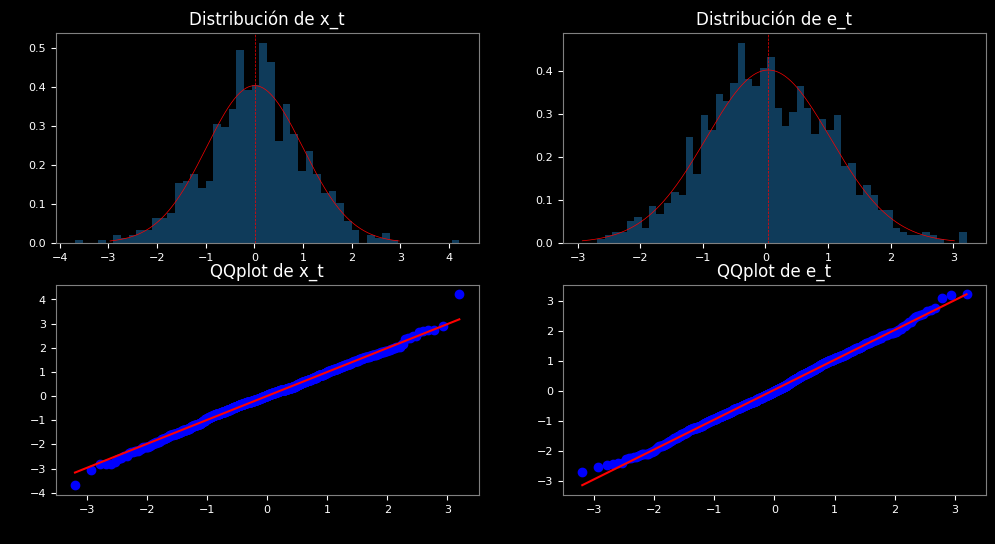

In [89]:
# Generar artificialmente las siguientes variables:
u = 0
var = 1
x_t = 1.*np.random.randn(1000, 1) + 0
e_t = 1.*np.random.randn(1000, 1) + 0
u_x_t, u_e_t= np.mean(x_t), np.mean(e_t)
sigma_x_t, sigma_e_t = np.std(x_t), np.std(e_t)
x_vals_x_t, x_vals_e_t = np.linspace(u_x_t - 3*sigma_x_t, u_x_t + 3*sigma_x_t, 500), np.linspace(u_e_t - 3*sigma_e_t, u_e_t + 3*sigma_e_t, 500)
y_vals_x_t, y_vals_e_t = norm.pdf(x_vals_x_t, u_x_t, sigma_x_t), norm.pdf(x_vals_e_t, u_e_t, sigma_e_t)

# Graficar la distribución de ambas variables

fig, ax = plt.subplots(2, 2, figsize=(12, 6), facecolor="black")

ax[0, 0].hist(x_t, bins=50, density=True, alpha=0.5)
ax[0, 0].axvline(x=u_x_t, color='red', linestyle='--', linewidth=0.5)
ax[0, 0].plot(x_vals_x_t, y_vals_x_t, color='red', linewidth=0.5)
ax[0, 0].title.set_text('Distribución de x_t',)
ax[0, 0].set_facecolor("black")
ax[0, 1].hist(e_t, bins=50, density=True, alpha=0.5)
ax[0, 1].axvline(x=u_e_t, color='red', linestyle='--', linewidth=0.5)
ax[0, 1].plot(x_vals_e_t, y_vals_e_t, color='red', linewidth=0.5)
ax[0, 1].title.set_text('Distribución de e_t')
ax[0, 1].set_facecolor("black")
probplot(x_t.ravel(), dist="norm", plot=ax[1, 0])
ax[1, 0].title.set_text('QQplot de x_t')
ax[1, 0].set_facecolor("black")
probplot(e_t.ravel(), dist="norm", plot=ax[1, 1])
ax[1, 1].title.set_text('QQplot de e_t')
ax[1, 1].set_facecolor("black")

for row in ax:
    for a in row:
        a.tick_params(color="white")
        a.tick_params(axis="x", labelcolor="white", labelsize=8)
        a.tick_params(axis="y", labelcolor="white", labelsize=8)
        a.title.set_color("white")
        for spine in a.spines.values():
            spine.set_edgecolor("gray")
plt.show()

In [90]:
# Proceso Generador de Datos

y_t = 1.2 + 1.5 * x_t + e_t

In [91]:
# Estimación de una regresión lineal por MCO entre Yt y Xt

model = LinearRegression().fit(x_t, y_t)
print(f"El coeficiente estimado para Xt es {model.coef_[0]} y el bias es {model.intercept_}.")

El coeficiente estimado para Xt es [1.500221] y el bias es [1.24556138].


**Construcción de hipótesis para la prueba T**

A continuación, se presenta la definición de la hipótesis bilateral para la prueba T porque se busca determinar si el coeficiente estimado de $X_t$ es o no diferente de $1.6$.

La prueba T también conocida como prueba $t$ de Student se utiliza para comparar si un grupo difiere de un valor conocido (prueba $t$ de una muestra), si dos grupos difieren entre sí (prueba $t$ para muestras independientes) o si hay una diferencia significativa entre dos medias pareadas (prueba $t$ para muestras dependientes o pareadas).

$$
H_0: \beta = 1.6 \\
H_1: \beta \neq 1.6
$$

El estadístico de prueba $t$ se calcula de la siguiente manera:

$$
t = \frac{\hat{\beta} - 1.6}{SE(\hat{\beta})}
$$

Donde $\hat{\beta}$ es el coeficiente estimado y $SE(\hat{\beta})$ es el desviación estándar del coeficiente estimado.

La **varianza del término del error o Error Cuadrático Medio Residual** (MSE) se calcula de la siguiente manera:

$$
s^2 = \frac{1}{n-2}\sum_{i=1}^{n}({y}_i - \hat{y_i})^2
$$

El denominador $n-2$ indica los grados de libertad del modelo porque estamos estimando dos parámetros: intercepto y coeficiente.

Ahora, podemos calcular el valor del **Error Estándar del Coeficiente Estimado**:

$$
SE(\hat{\beta}) = \sqrt{\frac{s^2}{\sum(x_i - \bar{x_i})^2}}
$$

Dado que es una prubea bilateral $t$ de Student, el cálculo del $p_value$ se realiza de la siguiente manera:

$$
p_{value} = 2 ⋅ (1 - F_t(|t|, df))
$$

In [96]:
n = 100
alpha = 0.05 # determina la probabilidad de inducir al error al afirmar que el coeficiente de beta es diferente de 1.6 cuando no lo es.
beta_real = 1.5
beta_null = 1.6
beta_hat = model.coef_[0][0]
y_t_pred = model.predict(x_t)
x_mean = np.mean(x_t)
residuals = y_t - y_t_pred
s_squared = np.sum((residuals)**2) / (n-2)
se_beta = np.sqrt(s_squared / np.sum(x_t - x_mean)**2)
t_stat = (beta_hat - beta_null) / se_beta
p_value = 2 * (1 - t.cdf(abs(t_stat), df = n-2))
if p_value < alpha:
    print(f"Rechaza la hipótesis nula. El p-valor es {p_value}.")
else:
    print(f"No se rechaza la hipótesis nula. El p-valor es {p_value}.")

No se rechaza la hipótesis nula. El p-valor es 1.0.


In [93]:
# Realizar 10,000 iteraciones
n_iter = 10000
alpha = 0.05
beta_real = 1.5
beta_null = 1.6
n = 100

count_rejections = 0

for i in range(n_iter):
    x = np.random.randn(n, 1)
    e = np.random.randn(n, 1)
    y = 1.2 + beta_real * x + e

    model = LinearRegression().fit(x, y)
    beta_hat = model.coef_[0][0]
    y_pred = model.predict(x)
    residuals = y - y_pred
    s_squared = np.sum(residuals ** 2) / (n - 2)
    x_mean = np.mean(x)
    se_beta = np.sqrt(s_squared / np.sum((x - x_mean) ** 2))
    t_stat = (beta_hat - beta_null) / se_beta
    p_value = 2 * (1 - t.cdf(abs(t_stat), df = n - 2))
    if p_value < alpha:
        count_rejections += 1

power_normal = count_rejections / n_iter * 100
print(f"Potencia con errores normales: {power_normal:.2f}%")

Potencia con errores normales: 16.52%


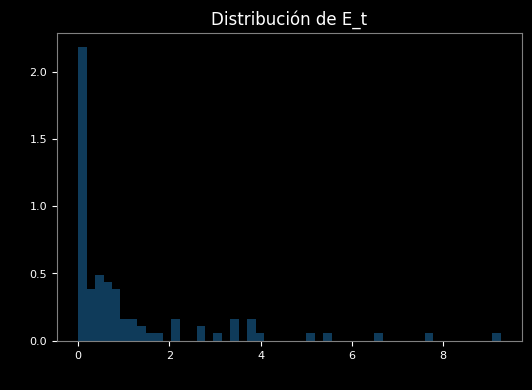

In [94]:
# E_t debe seguir una distribución chi cuadrado con 1 grado de libertad.
et = 1.*np.random.chisquare(1, (n-1))
x_vals_e_t = np.linspace(0, 20, 100)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), facecolor="black")
ax.hist(et, bins=50, density=True, alpha=0.5)
ax.set_facecolor("black")
ax.set_xlabel('E_t')
ax.set_ylabel('Densidad')
ax.set_title('Distribución de E_t')
ax.tick_params(color="white")
ax.tick_params(axis="x", labelcolor="white", labelsize=8)
ax.tick_params(axis="y", labelcolor="white", labelsize=8)
ax.title.set_color("white")
for spine in ax.spines.values():
    spine.set_edgecolor("gray")
plt.show()

In [95]:
# Realizar 10,000 iteraciones
n_iter = 10000
alpha = 0.05
beta_real = 1.5
beta_null = 1.6
n = 100
rng = np.random.default_rng(2025)

count_rejections = 0

for i in range(n_iter):
    x = np.random.randn(n, 1)
    e = np.random.chisquare(1, (n, 1))
    y = 1.2 + beta_real * x + e

    model = LinearRegression().fit(x, y)
    beta_hat = model.coef_[0][0]
    y_pred = model.predict(x)
    residuals = y - y_pred
    s_squared = np.sum(residuals ** 2) / (n - 2)
    x_mean = np.mean(x)
    se_beta = np.sqrt(s_squared / np.sum((x - x_mean) ** 2))
    t_stat = (beta_hat - beta_null) / se_beta
    p_value = 2 * (1 - t.cdf(abs(t_stat), df = n - 2))
    if p_value < alpha:
        count_rejections += 1

power_normal = count_rejections / n_iter * 100
print(f"Potencia con errores chi-cuadrado: {power_normal:.2f}%")

Potencia con errores chi-cuadrado: 11.04%


La potencia con errores normales es mayor que la potencia con errores chi-cuadrado porque la prueba $t$ de Student asume que los errores del modelo siguen una distribución normal con media 0 y varianza constante. Entonces, dado que los errores son normales se cumple todos los supuestos de normalidad de los errores. Mientras que cuando los errores son **chi-cuadrado** no se cumplen los supuestos de normalidad porque su distribución no es simétrica y tiene sesgos hacia la derecha, por ello, la estimación de la varianza se vuelve menos precisa, y como consecuencia, el valor del estadístico $t$ puede estar distorsionado, reduenciendo la potencia de la prueba.